In [160]:
import pandas as pd
import numpy as np

# these are the imports for mathplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# this line of code is what makes sure that the mathplotlib works as it should.
%matplotlib inline

In [161]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [162]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [163]:
# to find the datat type in the columns
df.dtypes

# to get the columns that are objects 
df.dtypes[df.dtypes == 'object']

# to modify the key or property of the key value pair

strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [164]:
#  to apply the cleaning features to all the columns in the tabe we do this:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [165]:
#  the data in the column have been cleaned as desired
# df.head()

In [166]:
# 2.3 EXPLORATORY DATA ANALYSIS
for col in df.columns:
    print(col)
    print(df[col].head(5) )
    print(df[col].nunique())
    print(df[col].unique()[:6])
    print()

engine_displacement
0    170
1    130
2    170
3    220
4    210
Name: engine_displacement, dtype: int64
36
[170 130 220 210 190 240]

num_cylinders
0    3.0
1    5.0
2    NaN
3    4.0
4    1.0
Name: num_cylinders, dtype: float64
14
[ 3.  5. nan  4.  1.  7.]

horsepower
0    159.0
1     97.0
2     78.0
3      NaN
4    140.0
Name: horsepower, dtype: float64
192
[159.  97.  78.  nan 140. 127.]

vehicle_weight
0    3413.433759
1    3149.664934
2    3079.038997
3    2542.392402
4    3460.870990
Name: vehicle_weight, dtype: float64
9704
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999
 2484.88398604]

acceleration
0    17.7
1    17.8
2    15.1
3    20.2
4    14.4
Name: acceleration, dtype: float64
162
[17.7 17.8 15.1 20.2 14.4 14.7]

model_year
0    2003
1    2007
2    2018
3    2009
4    2009
Name: model_year, dtype: int64
24
[2003 2007 2018 2009 2008 2012]

origin
0    europe
1       usa
2    europe
3       usa
4    europe
Name: origin, dtype: object
3
['europe' 'usa

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

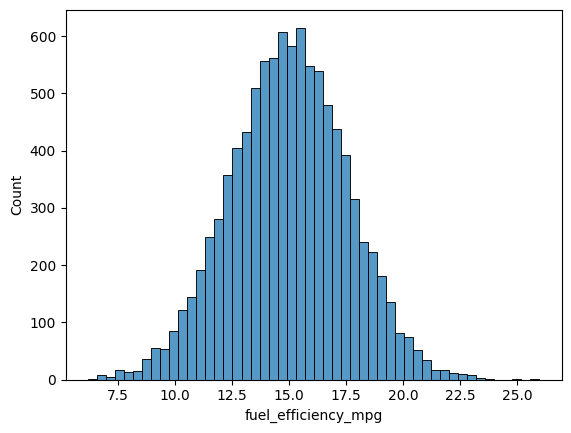

In [167]:
#  we want to consider the distribution of prices
# this kind of distribution is called  A LONG TAIL DISTRIBUTION because of the tail. the tail distribution is usually not good for training models unless its changed using logarithm
sns.histplot(df.fuel_efficiency_mpg, bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

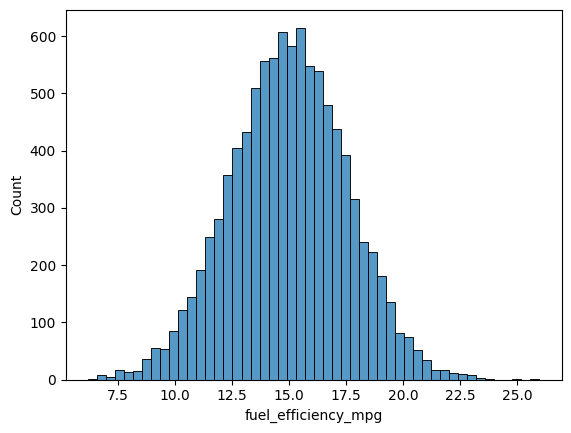

In [168]:
#  we can zoom in and be more detailed as. we have decided to see cars that are 1000 or less
sns.histplot(df.fuel_efficiency_mpg[df.fuel_efficiency_mpg < 100000], bins=50)

In [169]:
#  to make the long tail distribution, we use logarithm
# np.log([0+1,1+1,10+1,1000+1,100000+1]) or THIS IS LOGARITHM TRANSFORMATION
np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [170]:
price_logs = np.log1p(df.fuel_efficiency_mpg)
price_logs

0       2.655474
1       2.687046
2       2.724340
3       2.885512
4       2.601828
          ...   
9699    2.778931
9700    2.942454
9701    2.900684
9702    2.793099
9703    2.765342
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

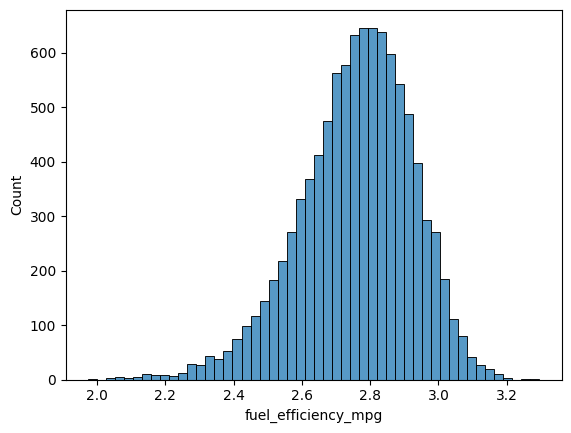

In [171]:
#  if we take the price logs that have just been worked on using logarithm, we can now have a distribution referred to as NORMAL DISTRIBUTION

sns.histplot(price_logs, bins=50)

In [172]:
# MISSING VALUES. this is how we find missing values in the columns

df.isnull().sum()



engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [173]:
# 2.4 SETTING UP THE VALIDATION MODEL
#  WE TRAIN, VALIDATE AND TEST our data set to create our model.

# to get the length or quantity of the data set
n = len(df)
# to get the validation data
n_val = int(n * 0.2)
#  to get the test data
n_test = int(n * 0.2)
#to get the data for training
n_train = n - n_val - n_test


# these are the sizes of the data breakdown
n_train, n_val,n_test


(5824, 1940, 1940)

In [174]:
# accessing the data for their different functions. iloc can be used to target specific areas of the table

df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]




# its always import to shuffle your data
# creating a sequence of numbers from 1 to n-1 before shuffling
idx = np.arange(n)

# we shuffle the sequence of numbers we have been able to create from the no of items in the column
np.random.shuffle(idx)



df_train = df.iloc[idx[n_train:]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# here the provided rows are shuffled
df.iloc[idx[:10]]


# this provides the length of each of the components for training the model.
len(df_train),len(df_val),len(df_test)



# to reset the column to the original index distribution
df_train = df_train.reset_index(drop=True)






In [175]:
#  carrying out the log transformation of the elements of data for training the model
y_train = np.log1p(df_train.fuel_efficiency_mpg)
y_val = np.log1p(df_val.fuel_efficiency_mpg)
y_test = np.log1p(df_test.fuel_efficiency_mpg)


In [176]:
#  to avoid making the mistake of using this  msrp values, it should be deleted as follows
del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']

In [177]:
len(y_train)

3880

In [178]:
# 2.5 LINEAR REGRESSION
# used for solving regression and for handling numbers. 
# lets start of by considering only one car row: 
df_train.iloc[10]

engine_displacement                170
num_cylinders                      2.0
horsepower                       186.0
vehicle_weight              2292.55452
acceleration                      15.9
model_year                        2006
origin                             usa
fuel_type                     gasoline
drivetrain             all-wheel_drive
num_doors                         -2.0
Name: 10, dtype: object

In [179]:
# this is the feature matrix that we will consider for our process. xi1=380,xi2=15,xi3=61
xi = [155,21,481]

In [180]:
# we will need to implement something in the form of
def g(xi):
    # do something
    return 10000

g(xi)

# these values for weight are arbitrary for the test case for now
w0=0
w=[1,1,1]

# another set of weights is
w0 = 7.17
w=[0.01,0.04,0.002]

In [181]:
#the formula: g(xi)=w0 + w1.xi1 + w2.xi2 + w3.xi3 
# g(xi) = w0 + 3Ej-1(wj.xij)

def linear_regression(xi):
    n=len(xi)

    pred = w0

    for j in range(n):
        #do something
        pred = pred + w[j]*xi[j]

        return pred


linear_regression(xi)
# 
# recall that we changed our values to make them logarithmic, we have to change them to exponential




8.72

In [182]:
#  from  the prediction of '8.72', we calculate the exponential.
np.expm1(8.72).round(2)

np.float64(6123.18)

In [183]:
# 2.6 LINEAR REGRESSION VECTOR FORM.
#  dot here is from dot notation
def dot(xi,w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

        return res
    

def linear_regression(xi):
    return w0 + dot(xi,w)


w_new = [w0] + w


def linear_regression(xi):
    xi = [1] + xi
    return w0 + dot(xi,w_new)



linear_regression(xi)

14.34

In [184]:
# we start each of the rows with the features we have chosen to use with 1 and we create matrix of matrix

# features from row 1 2 and 10
x1 = [1, 148, 24, 1385]
x2 = [1, 148, 24, 1385]
x10 = [1, 148, 24, 1385]


X = [x1, x2, x10]
# change the list of list into a mattrix

X = np.array(X)
X


array([[   1,  148,   24, 1385],
       [   1,  148,   24, 1385],
       [   1,  148,   24, 1385]])

In [185]:
# now we can multiply the matix we created from the features of the table and the the vector which is the corresponding targets from the rows.

# so linear regression now becomes
def linear_regression(X):
    return X.dot(w_new)


linear_regression(X)

array([12.38, 12.38, 12.38])

In [186]:
# 2.7 TRAINING A LINEAR REGRESSION MODEL 
# learning how to derive w, the vector

def train_linear_regression(X,y):
    pass



X = [
    [123, 28, 1345],
    [1243, 73, 3345],
    [126, 20, 3005],
    [1232, 43, 385],
    [145, 93, 349],
    [13, 28, 356],
    [1723, 73, 945],
    [113, 43, 325],
    [213, 49, 525]
]
X = np.array(X)
X

# Calculate for the GRAM MATRIX
# T means transpose
XTX = X.T.dot(X)

# find the inverse using numpy
XTX_inv = np.linalg.inv(XTX)

# multiplying both of them gives us an identity matris

XTX.dot(XTX_inv)

# lets assume our vector y

# note to create the bias of 1 on all the rows of the feature matrix. this is the same number of rows availibale in the feature matrix
ones = np.ones(X.shape[0])
ones

# # we can make use of column stach method in numpy to combine two vectors or a vector and matrix

X = np.column_stack([ones,X])
X
y = [100222, 222222, 333222, 444222, 567432, 768798, 345654, 654321, 564321 ]

XTX = X.T.dot(X)


XTX_inv = np.linalg.inv(XTX)


# # calculation for all the weight
w_full = XTX_inv.dot(X.T).dot(y)


# # this is for the first weight
w0 = w_full[0]
w0


# # this is for the remaining weights, starting from 1 to the end.
# w = w_full[1:]

w0,w


(np.float64(585995.0531239839), [0.01, 0.04, 0.002])